In [1]:
import pandas as pd
import numpy as np
#Import the plotly libraries
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
loandata=pd.read_csv('loan\loan.csv')

In [3]:
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loandata.shape

(39717, 111)

In [5]:
pd.options.display.max_columns = None

In [6]:
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

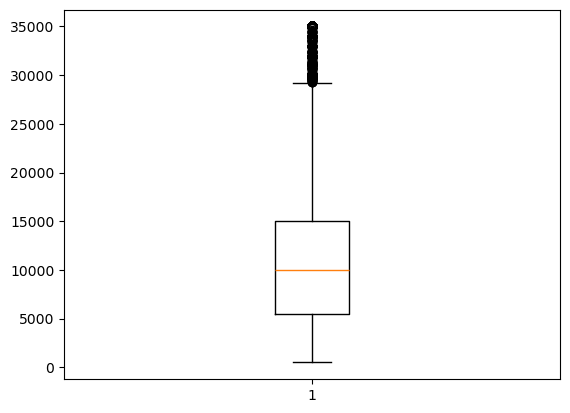

In [7]:
plt.boxplot(loandata.loan_amnt)
plt.show()

## It seems there are a few outliers beyond 25000 loan_amnt. We can check how many are there and discard if the number is small compared to 39K

In [8]:
loandata[loandata['loan_amnt']>28000].count()

id                            1282
member_id                     1282
loan_amnt                     1282
funded_amnt                   1282
funded_amnt_inv               1282
                              ... 
tax_liens                     1282
tot_hi_cred_lim                  0
total_bal_ex_mort                0
total_bc_limit                   0
total_il_high_credit_limit       0
Length: 111, dtype: int64

## 1613 is small compared to 39K. we can discard this data.

In [9]:
loandata[loandata['loan_amnt']<5000].count()

id                            7517
member_id                     7517
loan_amnt                     7517
funded_amnt                   7517
funded_amnt_inv               7517
                              ... 
tax_liens                     7508
tot_hi_cred_lim                  0
total_bal_ex_mort                0
total_bc_limit                   0
total_il_high_credit_limit       0
Length: 111, dtype: int64

## 7.5k is quite a big bracket. So keeping it back. 

In [10]:
## Creating new loandata set approximately half of difference between 30K and 25K
loandata = loandata[loandata['loan_amnt']<28000]
loandata.count()

id                            38287
member_id                     38287
loan_amnt                     38287
funded_amnt                   38287
funded_amnt_inv               38287
                              ...  
tax_liens                     38248
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

## check whether income verification column has impact on loan_status

In [11]:
####Check data is clean or not for these two columns
loandata['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [12]:
loandata['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [13]:
loandata['verification_status'].isnull().sum()

0

In [14]:
loandata['loan_status'].isnull().sum()

0

## We notice from the above representation, that historically, loans for which the income was completely not verified,
## have a slightly higher chance of getting defaulted compared to those loans, where only income source was verified.
## However, income verification does not display a very significant role in predicting a loan defaulter within a given data scope.

In [15]:
borrower_income_verification_stats = loandata.groupby(['loan_status', 'verification_status']).size().unstack(fill_value=0)
print(borrower_income_verification_stats)

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                  2141             1391      1820
Current                       226              286       472
Fully Paid                  14541             8066      9344


In [16]:
df_melted = borrower_income_verification_stats.reset_index().melt(id_vars='loan_status', var_name='verification_status', value_name='Count')
print(df_melted)

   loan_status verification_status  Count
0  Charged Off        Not Verified   2141
1      Current        Not Verified    226
2   Fully Paid        Not Verified  14541
3  Charged Off     Source Verified   1391
4      Current     Source Verified    286
5   Fully Paid     Source Verified   8066
6  Charged Off            Verified   1820
7      Current            Verified    472
8   Fully Paid            Verified   9344


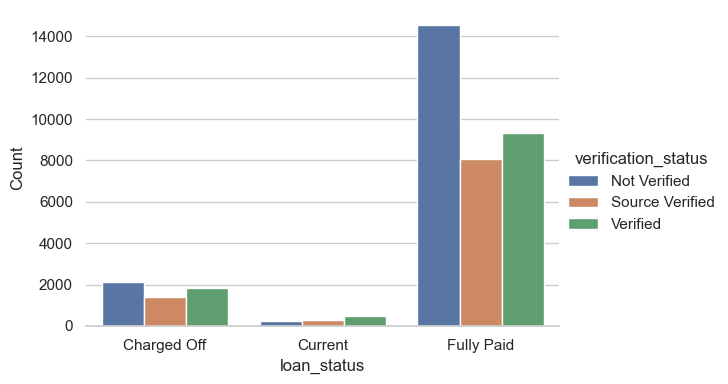

In [17]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=df_melted, kind="bar",
    x="loan_status", y="Count", hue="verification_status",
    height=4, aspect=1.5
)

g.despine(left=True)
g.set_axis_labels("loan_status", "Count")
g.legend.set_title("verification_status")

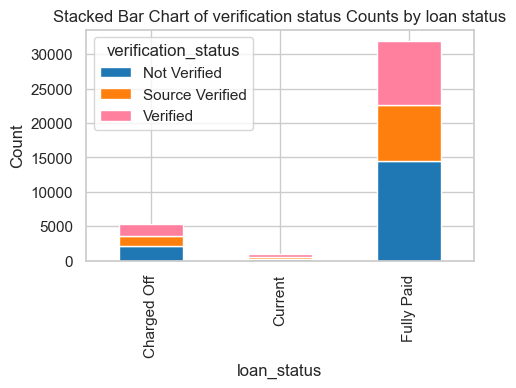

In [18]:
borrower_income_verification_stats.plot(kind='bar', stacked=True, figsize=(5, 3), color=['#1f77b4', '#ff7f0e','#ff7f9e'])

# Adding labels and title
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of verification status Counts by loan status')
plt.legend(title='verification_status')

# Display the plot
plt.show()

## Check term column clean or not

In [19]:
loandata['term'].isnull().sum()

0

In [20]:
loandata['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
borrower_term_stats = loandata.groupby(['loan_status','term']).size().unstack(fill_value=0)

In [22]:
print(borrower_term_stats)

term          36 months   60 months
loan_status                        
Charged Off        3195        2157
Current               0         984
Fully Paid        25539        6412


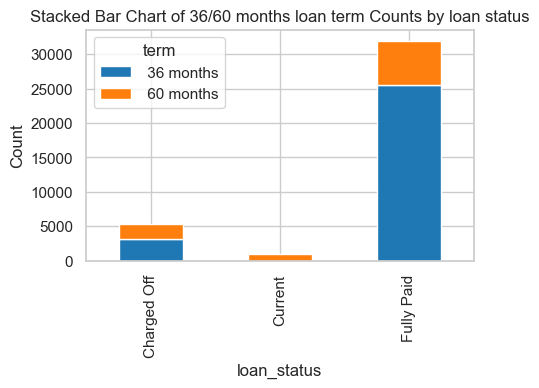

In [23]:
borrower_term_stats.plot(kind='bar', stacked=True, figsize=(5, 3), color=['#1f77b4', '#ff7f0e','#ff7f9e'])

# Adding labels and title
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of 36/60 months loan term Counts by loan status')
plt.legend(title='term')

# Display the plot
plt.show()

In [24]:
df_melted = borrower_term_stats.reset_index().melt(id_vars='loan_status', var_name='term', value_name='Count')
print(df_melted)

   loan_status        term  Count
0  Charged Off   36 months   3195
1      Current   36 months      0
2   Fully Paid   36 months  25539
3  Charged Off   60 months   2157
4      Current   60 months    984
5   Fully Paid   60 months   6412


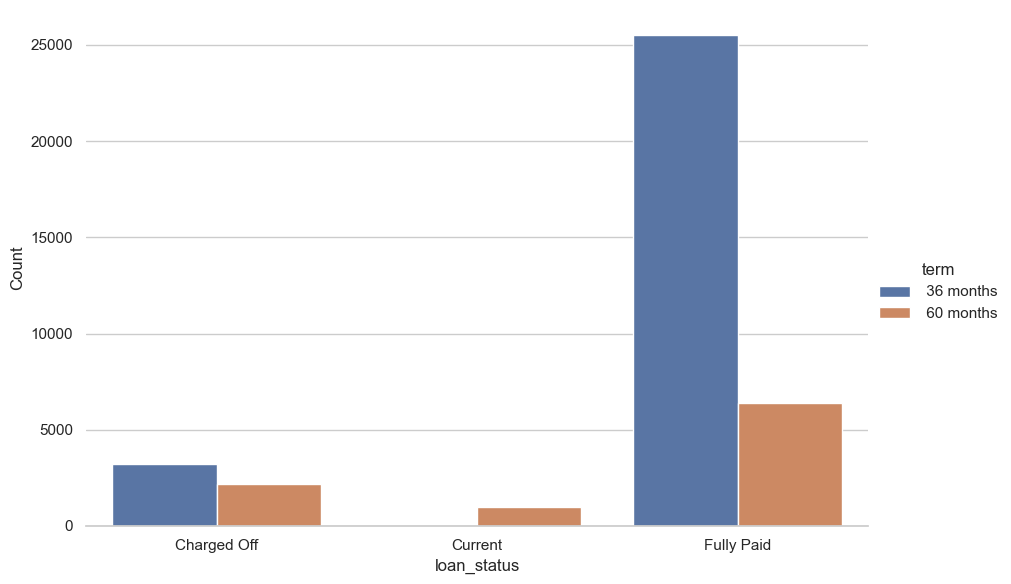

In [25]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=df_melted, kind="bar",
    x="loan_status", y="Count", hue="term",
    height=6, aspect=1.5
)

g.despine(left=True)
g.set_axis_labels("loan_status", "Count")
g.legend.set_title("term")

## The loans with a loan term of 36 months have defaulted more than loans with a total term of 60 months
## Currently no loans are being served with 36 months term. 
## We can assume that defaulter risk is less in the current scenario within the given data scope

## ===========================================================================================================================

## Check term column clean or not

In [26]:
loandata['loan_amnt'].isnull().sum()

0

## check emp_length is clean or not

In [27]:
loandata['emp_length'].isnull().sum()

1052

## emp_length is having 1075 null values. These should be removed

In [28]:
loandata['emp_length'].value_counts()

emp_length
10+ years    8326
< 1 year     4487
2 years      4275
3 years      3983
4 years      3335
1 year       3172
5 years      3169
6 years      2150
7 years      1710
8 years      1402
9 years      1226
Name: count, dtype: int64

In [29]:
loandata1=loandata[~(loandata['emp_length'].isnull())]

In [30]:
loandata1['emp_length'].isnull().sum()

0

## loandata1 is clean for emp_length now

In [31]:
borrower_emp_length_stats = loandata1[loandata1['loan_status']=='Charged Off'].groupby(['loan_status','emp_length']).size().unstack(fill_value=0)
print(borrower_emp_length_stats)

emp_length   1 year  10+ years  2 years  3 years  4 years  5 years  6 years  \
loan_status                                                                   
Charged Off     447       1220      548      531      440      439      295   

emp_length   7 years  8 years  9 years  < 1 year  
loan_status                                       
Charged Off      244      192      155       619  


In [32]:
df_melted = borrower_emp_length_stats.reset_index().melt(id_vars='loan_status', var_name='emp_length', value_name='Count')
print(df_melted)

    loan_status emp_length  Count
0   Charged Off     1 year    447
1   Charged Off  10+ years   1220
2   Charged Off    2 years    548
3   Charged Off    3 years    531
4   Charged Off    4 years    440
5   Charged Off    5 years    439
6   Charged Off    6 years    295
7   Charged Off    7 years    244
8   Charged Off    8 years    192
9   Charged Off    9 years    155
10  Charged Off   < 1 year    619


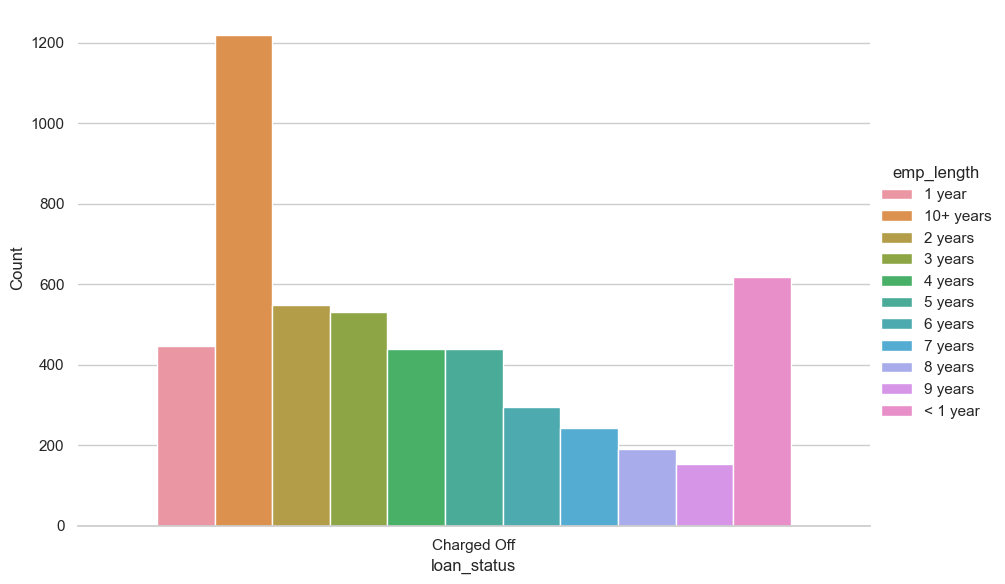

In [33]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=df_melted, kind="bar",
    x="loan_status", y="Count", hue="emp_length",
    height=6, aspect=1.5
)

g.despine(left=True)
g.set_axis_labels("loan_status", "Count")
g.legend.set_title("emp_length")

## The above data shows the defaulting borrower's employment length data. 
## It shows that borrowers with 10+ years of employment have failed to repay a loan.
## This might indicate that the employment data provided was fraudulent.
## We can further check whether verification was done for these categories.

In [34]:
defaulter_emp_length_stats = loandata1[loandata1['loan_status']=='Charged Off'].groupby(['emp_length','verification_status']).size().unstack(fill_value=0)
print(defaulter_emp_length_stats)

verification_status  Not Verified  Source Verified  Verified
emp_length                                                  
1 year                        206              120       121
10+ years                     419              282       519
2 years                       230              153       165
3 years                       213              159       159
4 years                       178              114       148
5 years                       178              114       147
6 years                       108               83       104
7 years                        99               65        80
8 years                        77               39        76
9 years                        64               38        53
< 1 year                      276              186       157


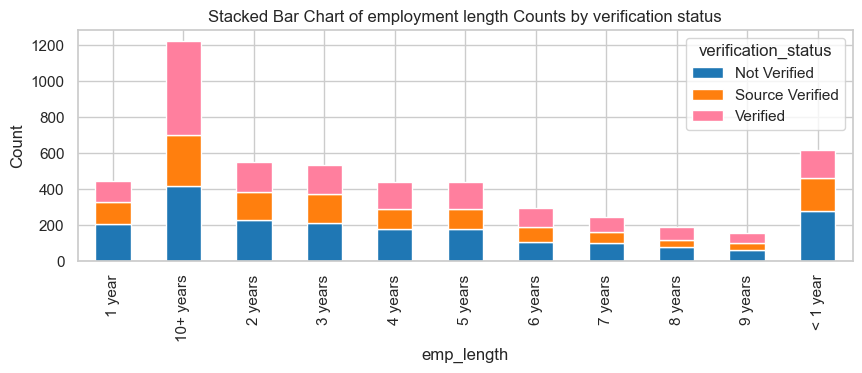

In [35]:
defaulter_emp_length_stats.plot(kind='bar', stacked=True, figsize=(10, 3), color=['#1f77b4', '#ff7f0e','#ff7f9e'])

# Adding labels and title
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of employment length Counts by verification status')
plt.legend(title='verification_status')

# Display the plot
plt.show()

## From the above data we can infer that compared to all employment length brackets, 10+ years borrower's income verification lacked the most.
## Also that is the biggest segment where only the source of income was verified.
## Segment with employment length brackets of less than 1 year is the second most lacking in income verification.
## We can study this on currently serving loans too to see if we can predict any risk

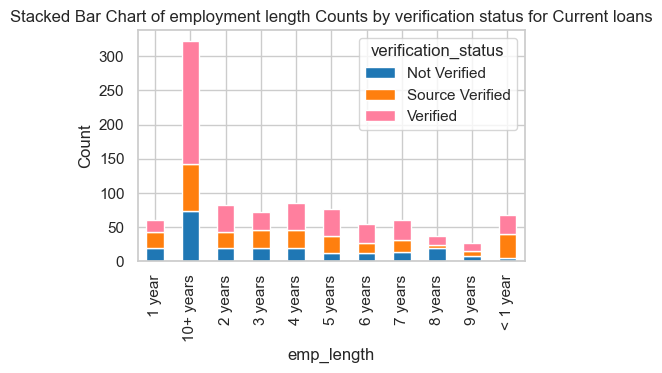

In [36]:
current_emp_length_stats = loandata1[loandata1['loan_status']=='Current'].groupby(['emp_length','verification_status']).size().unstack(fill_value=0)
current_emp_length_stats.plot(kind='bar', stacked=True, figsize=(5, 3), color=['#1f77b4', '#ff7f0e','#ff7f9e'])

# Adding labels and title
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of employment length Counts by verification status for Current loans')
plt.legend(title='verification_status')

# Display the plot
plt.show()

## We can represent the percent value within each employment length segment

## We can now check how much the total amount of loan given was contributed per employment length brackets where the loan got charged off

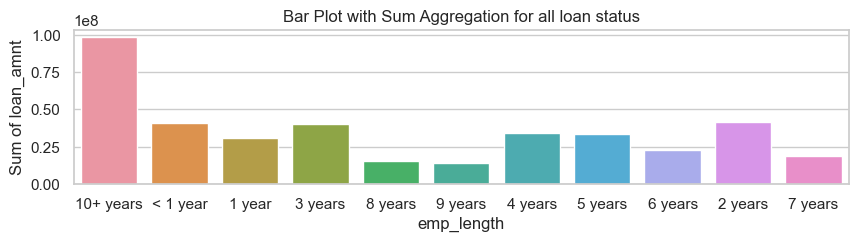

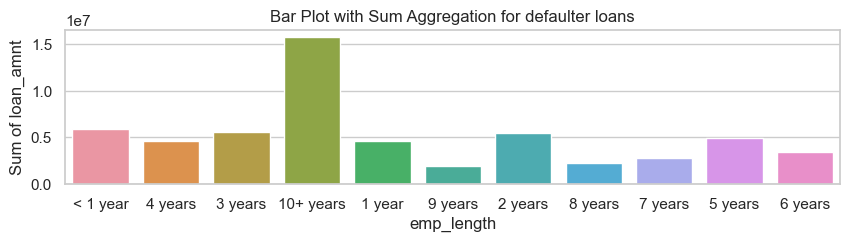

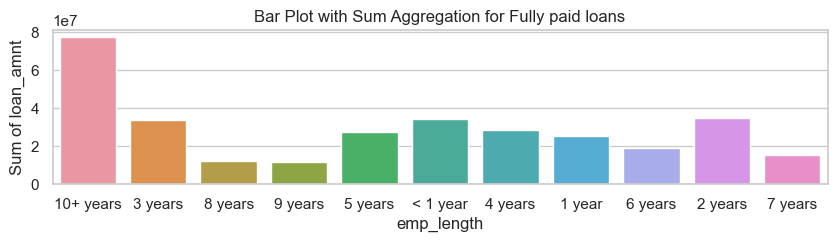

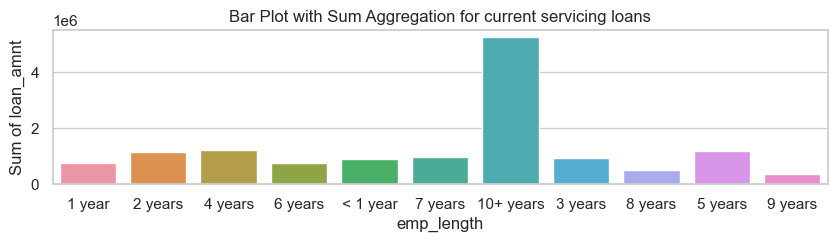

In [37]:
plt.figure(figsize=(10, 2))
sns.barplot(data=loandata1, x='emp_length', y='loan_amnt', estimator=sum, ci=None)

# Adding labels and title
plt.xlabel('emp_length')
plt.ylabel('Sum of loan_amnt')
plt.title('Bar Plot with Sum Aggregation for all loan status')

# Display the plot
plt.show()

plt.figure(figsize=(10, 2))
sns.barplot(data=loandata1[loandata1['loan_status']=='Charged Off'], x='emp_length', y='loan_amnt', estimator=sum, ci=None)

# Adding labels and title
plt.xlabel('emp_length')
plt.ylabel('Sum of loan_amnt')
plt.title('Bar Plot with Sum Aggregation for defaulter loans')

# Display the plot
plt.show()
plt.figure(figsize=(10, 2))
sns.barplot(data=loandata1[loandata1['loan_status']=='Fully Paid'], x='emp_length', y='loan_amnt', estimator=sum, ci=None)

# Adding labels and title
plt.xlabel('emp_length')
plt.ylabel('Sum of loan_amnt')
plt.title('Bar Plot with Sum Aggregation for Fully paid loans')

# Display the plot
plt.show()

plt.figure(figsize=(10, 2))
sns.barplot(data=loandata1[loandata1['loan_status']=='Current'], x='emp_length', y='loan_amnt', estimator=sum, ci=None)

# Adding labels and title
plt.xlabel('emp_length')
plt.ylabel('Sum of loan_amnt')
plt.title('Bar Plot with Sum Aggregation for current servicing loans')

# Display the plot
plt.show()

## From the above analysis we infer that most loans were given to the 10+ years segment and they have shown a steady defaulter rate
## 9 years segment was given the least number of loans but they have demonstrated good payback history

## Next we can check for the subgrade impact on the loan defaulter

In [38]:
loandata1['grade'].isnull().sum()

0

In [39]:
loandata1['grade'].value_counts()

grade
B    11369
A     9585
C     7710
D     5001
E     2456
F      854
G      260
Name: count, dtype: int64

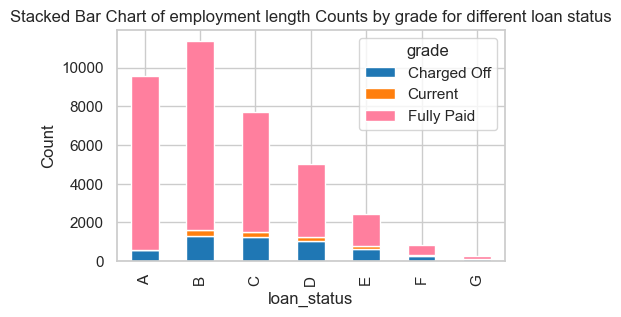

In [40]:
grade_stats = loandata1.groupby(['grade','loan_status']).size().unstack(fill_value=0)
grade_stats.plot(kind='bar', stacked=True, figsize=(5, 3), color=['#1f77b4', '#ff7f0e','#ff7f9e'])

# Adding labels and title
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of employment length Counts by grade for different loan status')
plt.legend(title='grade')

# Display the plot
plt.show()

## D-grade loans tend to be defaulters. I don't have any insight into how the grading is done.

## We can check impact of purpose
## Start with cleaning data

In [41]:
loandata1['purpose'].isnull().sum()

0

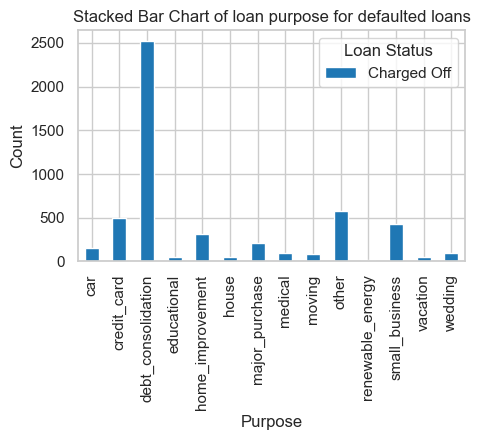

In [42]:
grade_stats = loandata1[loandata1['loan_status']=='Charged Off'].groupby(['purpose','loan_status']).size().unstack(fill_value=0)
grade_stats.plot(kind='bar', stacked=True, figsize=(5, 3), color=['#1f77b4', '#ff7f0e','#ff7f9e'])

# Adding labels and title
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of loan purpose for defaulted loans')
plt.legend(title='Loan Status')

# Display the plot
plt.show()

## Check which borrowers from which state defaulted in paying back loans

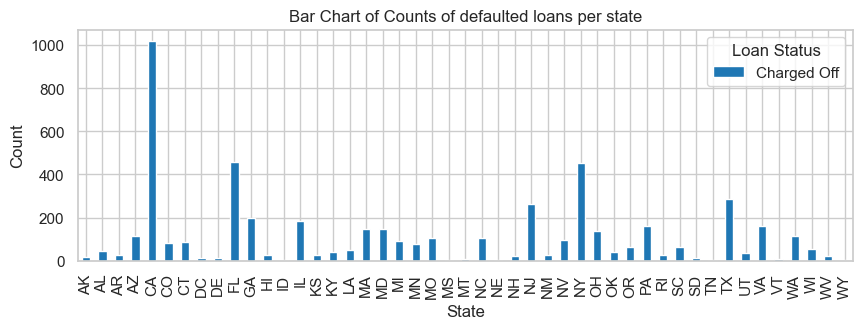

In [43]:

grade_stats = loandata1[loandata1['loan_status']=='Charged Off'].groupby(['addr_state','loan_status']).size().unstack(fill_value=0)
grade_stats.plot(kind='bar', stacked=True, figsize=(10, 3), color=['#1f77b4', '#ff7f0e','#ff7f9e'])

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Bar Chart of Counts of defaulted loans per state')
plt.legend(title='Loan Status')

# Display the plot
plt.show()

## We infer that borrowers from CA has defaulted on loan pay back

## Check home ownership correlation with loan payback defaulter data

In [44]:
loandata1['home_ownership'].value_counts()

home_ownership
RENT        18131
MORTGAGE    16236
OWN          2767
OTHER          98
NONE            3
Name: count, dtype: int64

In [45]:
loandata1['home_ownership'].isnull().sum()

0

## We note that there are 98 records with home ownership data as OTHER and 3 with NONE. These are insignificant and can be removed.

In [46]:
loandata2 = loandata1[(loandata1['home_ownership']!='OTHER') & (loandata1['home_ownership']!='NONE')]

In [47]:
loandata2['home_ownership'].value_counts()

home_ownership
RENT        18131
MORTGAGE    16236
OWN          2767
Name: count, dtype: int64

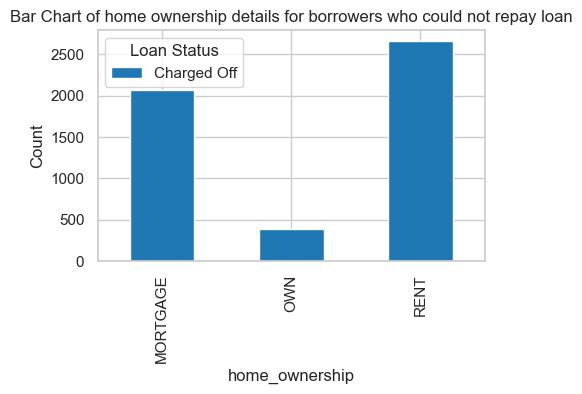

In [48]:
grade_stats = loandata2[loandata2['loan_status']=='Charged Off'].groupby(['home_ownership','loan_status']).size().unstack(fill_value=0)
grade_stats.plot(kind='bar', stacked=True, figsize=(5, 3), color=['#1f77b4', '#ff7f0e','#ff7f9e'])

# Adding labels and title
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.title('Bar Chart of home ownership details for borrowers who could not repay loan')
plt.legend(title='Loan Status')

# Display the plot
plt.show()

## From the above data we can say borrowers staying in rented houses/apartments were not able to repay the loan